# Bella Beat Data Analysis

## Tasks:
 1. Identify Business Task
 2. Prepare Environment & Data
 3. Import Data
 4. Process Data
 5. Analyze Data
 6. Share Data
 7. Act 

 

## 1. Business Task:
### Utilize insights gained from accessing publicly available data  from Fitbit Data Set to create informed suggestions for improvements in line with BellaBeat brand product line. 
### Cross reference time User spends in bed prior to sleep as indicator of daily acitivity levels.
# Hypothesis: Time spent falling asleep is an indicator of daily activity. Use as reference for app side exercise recommendations.

## 2. Prepare Environment & Data
### Import  Library
 - Pandas library focuses on data analysis 
 - Numpy if complex math required
 - Matplotlib to plot data from multiple charts if pandas in incapable

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 3. Import Data
 Access Public Fitbit Data Set located [here] (https://www.kaggle.com/arashnic/fitbit)



## 4. Process Data
 - Assign Spread Sheets To Pandas DataFrame
 - Simplifies later queries by providing fast object for data manipulation.

In [10]:
activity  = pd.read_csv("dailyActivity_merged.csv")
sleep = pd.read_csv("sleepDay_merged.csv")
calories = pd.read_csv("dailyCalories_merged.csv")
steps = pd.read_csv("dailySteps_merged.csv")
                    

### Looking At First Five Rows To Check Dataframes Function Correctly
 - Used Display Function To View All Outputs Simultaneously


In [11]:
display(sleep.head())
display(activity.head())
display(calories.head())
display(steps.head())

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669


 - Noticed that steps & calorie DataFrames are not necessary as they are within the activity DataFrame. Will discontinue independent use.

#### DataFrame sleep does not calculate time spent in bed awake. Creating Function to add additional column to house data

In [12]:
sleep["TimeAwakeInBed"] = sleep["TotalTimeInBed"] - sleep["TotalMinutesAsleep"]

#### Test To See If Column Created Successfully 

In [13]:
sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TimeAwakeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346,19
1,1503960366,4/13/2016 12:00:00 AM,2,384,407,23
2,1503960366,4/15/2016 12:00:00 AM,1,412,442,30
3,1503960366,4/16/2016 12:00:00 AM,2,340,367,27
4,1503960366,4/17/2016 12:00:00 AM,1,700,712,12


#### Removing Unnecessary Time Formatting in SleepDay Column

In [14]:
sleep['SleepDay'] = sleep['SleepDay'].str[:-11]
sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TimeAwakeInBed
0,1503960366,4/12/2016,1,327,346,19
1,1503960366,4/13/2016,2,384,407,23
2,1503960366,4/15/2016,1,412,442,30
3,1503960366,4/16/2016,2,340,367,27
4,1503960366,4/17/2016,1,700,712,12


#### Renaming SleepDay To ActivityDate To Match Format In activity

In [15]:
sleep.rename(columns={"SleepDay" : "ActivityDate" }, inplace = True)
sleep.head()

,Id,ActivityDate,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TimeAwakeInBed
0,1503960366,4/12/2016,1,327,346,19
1,1503960366,4/13/2016,2,384,407,23
2,1503960366,4/15/2016,1,412,442,30
3,1503960366,4/16/2016,2,340,367,27
4,1503960366,4/17/2016,1,700,712,12


#### Grouping sleep Times To Average Mean. 
#### Also Making New DF To Not Alter Original File When Combining 
#### Calling New DF

In [16]:
sleep_new = sleep.groupby("Id").mean()
sleep_new.head()

,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TimeAwakeInBed
Id,,,,
1503960366,1.08,360.280000,383.200000,22.920000
1644430081,1.00,294.000000,346.000000,52.000000
1844505072,1.00,652.000000,961.000000,309.000000
1927972279,1.60,417.000000,437.800000,20.800000
2026352035,1.00,506.178571,537.642857,31.464286


#### Check activity Before Grouping By Means

In [17]:
activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


####  Group acitivity By Means On Id.
#### Also Making New DF To Not Alter Original File When Combining 
#### Calling New DF

In [18]:
activity_new = activity.groupby('Id').mean()
activity_new.head()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
Id,,,,,,,,,,,,,
1503960366,12116.741935,7.809677,7.809677,0.0,2.858387,0.794194,4.152903,0.000000,38.709677,19.161290,219.935484,848.161290,1816.419355
1624580081,5743.903226,3.914839,3.914839,0.0,0.939355,0.360645,2.606774,0.006129,8.677419,5.806452,153.483871,1257.741935,1483.354839
1644430081,7282.966667,5.295333,5.295333,0.0,0.730000,0.951000,3.609000,0.004000,9.566667,21.366667,178.466667,1161.866667,2811.300000
1844505072,2580.064516,1.706129,1.706129,0.0,0.008387,0.049032,1.647419,0.000000,0.129032,1.290323,115.451613,1206.612903,1573.483871
1927972279,916.129032,0.634516,0.634516,0.0,0.095806,0.031290,0.507097,0.000000,1.322581,0.774194,38.580645,1317.419355,2172.806452


## 5. Analyzing Data
### Checking Correlation Between General Activity & Time Spent Awake In Bed
### Noticed Extreme Outliers In Awake Bed Time. Removing To Increase Clarity.

In [19]:
day_night = pd.merge(activity_new, sleep_new, on='Id')
day_night.head()
day_night = day_night[day_night['TimeAwakeInBed']<=150]

### Create Basic ScatterPlot To Visualize Data
#### Begin To Check Hypothesis

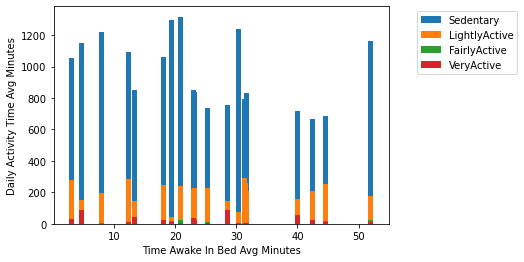

In [20]:
plt.bar(day_night['TimeAwakeInBed'], day_night['SedentaryMinutes'], label="Sedentary")
plt.bar(day_night['TimeAwakeInBed'], day_night['LightlyActiveMinutes'], label="LightlyActive")
plt.bar(day_night['TimeAwakeInBed'], day_night['FairlyActiveMinutes'], label="FairlyActive")
plt.bar(day_night['TimeAwakeInBed'],day_night['VeryActiveMinutes'], label='VeryActive')
plt.xlabel("Time Awake In Bed Avg Minutes")
plt.ylabel("Daily Activity Time Avg Minutes")
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 1))
plt.show()

### ScatterPlot Too Spread To Easily Visualize. Breaking Down To Key Time Groups
#### Seperating Into 10 Minute Groups

In [21]:
under_ten = day_night[day_night['TimeAwakeInBed']<10].groupby(['Id'])
under_twenty = day_night[(day_night['TimeAwakeInBed']>=10) & (day_night['TimeAwakeInBed']<20)].groupby(['Id'])
under_thirty = day_night[(day_night['TimeAwakeInBed']>=20) & (day_night['TimeAwakeInBed']<30)].groupby(['Id'])
under_forty = day_night[(day_night['TimeAwakeInBed']>=30) & (day_night['TimeAwakeInBed']<40)].groupby(['Id'])
under_fifty = day_night[(day_night['TimeAwakeInBed']>=40) & (day_night['TimeAwakeInBed']<50)].groupby(['Id'])

### Finding Mean For Groups As Individual Data Is Not Easily Compared

In [22]:
under_ten_activity = under_ten[['SedentaryMinutes','LightlyActiveMinutes', 'FairlyActiveMinutes','VeryActiveMinutes']].mean()
under_ten_activity_mean = under_ten_activity.mean()

under_twenty_activity = under_twenty[['SedentaryMinutes','LightlyActiveMinutes', 'FairlyActiveMinutes','VeryActiveMinutes']].mean()
under_twenty_activity_mean = under_twenty_activity.mean()

under_thirty_activity = under_thirty[['SedentaryMinutes','LightlyActiveMinutes', 'FairlyActiveMinutes','VeryActiveMinutes']].mean()
under_thirty_activity_mean = under_thirty_activity.mean()

under_forty_activity = under_forty[['SedentaryMinutes','LightlyActiveMinutes', 'FairlyActiveMinutes','VeryActiveMinutes']].mean()
under_forty_activity_mean = under_forty_activity.mean()

under_fifty_activity = under_fifty[['SedentaryMinutes','LightlyActiveMinutes', 'FairlyActiveMinutes','VeryActiveMinutes']].mean()
under_fifty_activity_mean = under_fifty_activity.mean()


# 6. Share Data
### Create Pie Charts to Accurately Display Group Averages
#### Explode Parts That Are Highest Percentage When Compared To Other Groups

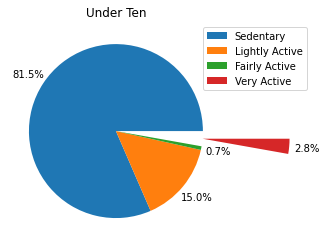

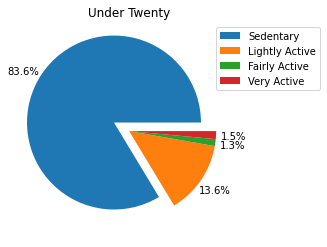

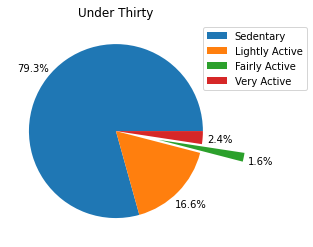

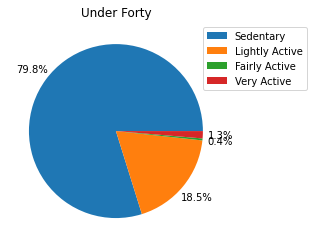

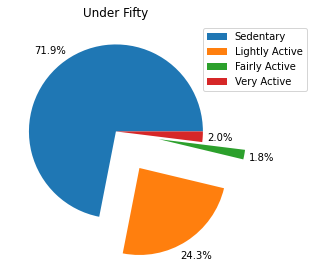

In [23]:
my_labels = 'Sedentary', 'Lightly Active', 'Fairly Active', 'Very Active'
my_explode  = (0, 0 , 0, 1)
plt.pie(under_ten_activity_mean, explode=my_explode, pctdistance=1.2, autopct='%1.1f%%')
plt.title("Under Ten")
plt.legend(my_labels,loc="upper right", bbox_to_anchor=(1.4, 1))
plt.show()

my_labels = 'Sedentary', 'Lightly Active', 'Fairly Active', 'Very Active'
my_explode  = (.2, 0 , 0, 0)
plt.pie(under_twenty_activity_mean, explode=my_explode, pctdistance=1.2, autopct='%1.1f%%')
plt.title("Under Twenty")
plt.legend(my_labels,loc="upper right", bbox_to_anchor=(1.4, 1))
plt.show()

my_labels = 'Sedentary', 'Lightly Active', 'Fairly Active', 'Very Active'
my_explode  = (0, 0 , .5, 0)
plt.pie(under_thirty_activity_mean, explode=my_explode, pctdistance=1.2, autopct='%1.1f%%')
plt.title("Under Thirty")
plt.legend(my_labels,loc="upper right", bbox_to_anchor=(1.4, 1))
plt.show()

my_labels = 'Sedentary', 'Lightly Active', 'Fairly Active', 'Very Active'
my_explode  = (0, 0 , 0, 0)
plt.pie(under_forty_activity_mean, explode=my_explode, pctdistance=1.2, autopct='%1.1f%%')
plt.title("Under Forty")
plt.legend(my_labels,loc="upper right", bbox_to_anchor=(1.4, 1))
plt.show()

my_labels = 'Sedentary', 'Lightly Active', 'Fairly Active', 'Very Active'
my_explode  = (0, .5 , .5, 0)
plt.pie(under_fifty_activity_mean, explode=my_explode, pctdistance=1.2, autopct='%1.1f%%')
plt.title("Under Fifty")
plt.legend(my_labels,loc="upper right", bbox_to_anchor=(1.4, 1))

plt.show()


# 7. Act
## Hypothesis: Time spent falling asleep is an indicator of daily activity. Use as reference for app side exercise recommendations.
# Does hypothesis hold true?
## Yes. Based on mean data aggregated from publicly available data we can conclude that average time spent in bed prior to sleep is an indicator of average daily physical activity levels.
# What recommendations can we make based on available data?
## We can recommend daily exercise activities via BellaBeat app based on activity levels derived from sleep tracking data.
## Notable differences in activity level seperated by average time spent falling asleep.

### If User is able to fall alseep in under 10 minutes they have highest percentage of being "very active" in their daily exercise or related activites when compared to the whole sample group.
### If User is able to fall alseep in 10-20 minutes they have highest percentage of being "sedintary" in their daily exercise or related activites when compared to the whole sample group.
### If User is able to fall alseep in 20-30 minutes they have highest percentage of being "very active" & or "lightly active" in their daily exercise or related activites when compared to the whole sample group.
### If User is able to fall alseep in 30-40 minutes they have no notable variance in their daily exercise or related activites when compared to the whole sample group.
### If User is able to fall alseep in 40-50 minutes they have highest percentage of being "very active", "lightly active", &/or "fairly active" in their daily exercise or related activites when compared to the whole sample group.

## The most active users are those who either spend under 10,  30-40, or  40-50 minutes falling asleep on average. The least active users are those who spent between 10-20  or 30-40 minutes falling asleep.